In [1]:
import pickle

# Pfad zur gespeicherten .pkl-Datei
filename = "data/pickle/chunks.pkl"

# Laden der Liste aus der .pkl-Datei
with open(filename, "rb") as file:
    processed_documents = pickle.load(file)

# Ausgabe der ersten Einträge, um zu überprüfen, dass das Laden erfolgreich war
for i, doc in enumerate(processed_documents):
    print(f"Document {i}:\n")
    for token_info in doc:
        print(token_info)
    print("\n" + "="*50 + "\n")

# Optional: Begrenze die Ausgabe auf die ersten 5 Dokumente, wenn es viele sind
    if i >= 4:
        break

Document 0:

('blaue', 'ADJ', 'blau')
('altglascontainer', 'NOUN', 'Altglascontainer')
('saubere', 'ADJ', 'sauber')
('flaschen', 'NOUN', 'Flasche')
('deckelgläser', 'NOUN', 'Deckelglas')
('farben', 'NOUN', 'Farbe')
('weiß', 'ADJ', 'weiß')
('blaues', 'ADJ', 'blau')
('buntes', 'ADJ', 'bunt')
('glas', 'NOUN', 'Glas')
('grünglas', 'NOUN', 'Grünglas')
('geben', 'VERB', 'geben')
('aschen', 'ADJ', 'asch')
('konservengläser', 'NOUN', 'Konservenglas')
('scheiben', 'VERB', 'Scheiben')
('restmüll', 'NOUN', 'Restmüll')
('trinkgläser', 'NOUN', 'Trinkgläser')
('porzellan', 'NOUN', 'Porzellan')
('keramik', 'NOUN', 'Keramik')
('glühbirnen', 'NOUN', 'Glühbirne')
('restmüll', 'NOUN', 'Restmüll')
('energiesparlampen', 'NOUN', 'Energiesparlampe')
('wertstoffhöfe', 'NOUN', 'Wertstoffhof')
('verschmutzte', 'ADJ', 'verschmutzt')
('gläser', 'ADJ', 'Gläser')
('restmüll', 'ADJ', 'Restmüll')
('standort', 'NOUN', 'Standort')
('öffentlichen', 'ADJ', 'öffentlich')
('sperrmüll', 'VERB', 'Sperrmüll')
('plätzen', 'VER

In [3]:
from sentence_transformers import SentenceTransformer

def create_hybrid_embeddings(processed_documents, model_name='sentence-transformers/multi-qa-mpnet-base-dot-v1'):
    # Lade das vortrainierte Modell
    model = SentenceTransformer(model_name)
    
    # Listen für Embeddings und Metadaten
    embeddings = []
    metadatas = []
    
    # Durchlaufe jeden "processed_document" und erstelle Embeddings und Metadaten
    for doc in processed_documents:
        # Extrahiere den Text aus den Tupeln im "processed_document"
        text = ' '.join([token[0] for token in doc])  # Kombiniert alle Wörter zu einem zusammenhängenden Text
        
        # Erstelle das Embedding für den Text
        embedding = model.encode(text)
        embeddings.append(embedding)
        
        # Extrahiere relevante Metadaten (Lemmata)
        lemmas = [token[2] for token in doc]  # Nutze die Lemmata des Dokuments
        keywords = extract_keywords(lemmas)
        metadatas.append({
            'text': text,
            'keywords': keywords,
            # Weitere Metadaten wie Kategorien oder Tags hinzufügen
        })
    
    print(f"Erstellte {len(embeddings)} Embeddings und Metadaten.")
    return embeddings, metadatas

def extract_keywords(lemmas):
    # Beispielhafte erweiterte Funktion zur Extraktion von Schlüsselwörtern
    keywords = set()
    relevant_terms = {'papier', 'glas', 'biomüll', 'restmüll', 'verpackung', 'altglascontainer', 'wertstoffhof'}
    
    for lemma in lemmas:
        if lemma.lower() in relevant_terms:
            keywords.add(lemma.lower())
    
    return list(keywords)

# Beispiel-Aufruf mit dem neuen Format
embeddings, metadatas = create_hybrid_embeddings(processed_documents)

# Anzahl der Einträge, die Du anzeigen möchtest
num_examples = min(5, len(embeddings))  # Setzt num_examples auf 5 oder weniger, wenn nicht genug Embeddings vorhanden sind

# Ausgabe der ersten paar Embeddings und ihrer zugehörigen Metadaten
for i in range(num_examples):
    print(f"Chunk {i}:\n")
    print(f"Embedding: {embeddings[i][:10]}...")  # Zeigt nur die ersten 10 Werte des Embeddings
    print(f"Metadaten: {metadatas[i]}")
    print("\n" + "="*50 + "\n")

Erstellte 10 Embeddings und Metadaten.
Chunk 0:

Embedding: [-0.03529396 -0.2681408  -0.20776549  0.32234764  0.01191646 -0.3556172
  0.29910365  0.24749127  0.11207592  0.22963986]...
Metadaten: {'text': 'blaue altglascontainer saubere flaschen deckelgläser farben weiß blaues buntes glas grünglas geben aschen konservengläser scheiben restmüll trinkgläser porzellan keramik glühbirnen restmüll energiesparlampen wertstoffhöfe verschmutzte gläser restmüll standort öffentlichen sperrmüll plätzen frankfurter entsorgungs abfall trennen service gmbh fesservicecenter ecke töngesgasseschärfengässchen uhr uhr rgungsfachbetrie rrt trennen haus gehören abfallbehälter tonnen inhalt wertvoller rohstoff neuen produkten weiterverarbeitet graue restmülltonne gelbe tonne verpackungen grüne tonne papier pappe braune tonne bioabfälle graue tonne restlichen abfall restmüll gibt folgende entsorgungsangebote wertstoffe sichern altglascontainer flaschen deckelgläser nden öffentlichen plätzen altkleider contai

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


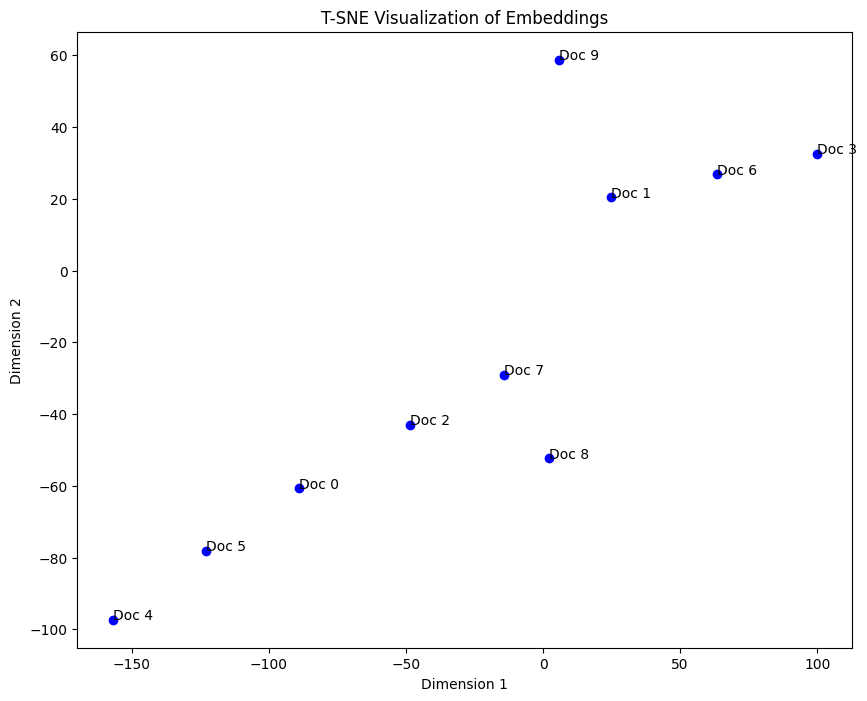

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_embeddings(embeddings, labels=None):
    # Konvertiere die Liste der Embeddings in ein Numpy-Array
    embeddings_array = np.array(embeddings)
    
    # Setze die Perplexity auf einen Wert kleiner als die Anzahl der Dokumente
    tsne = TSNE(n_components=2, random_state=42, perplexity=2)
    reduced_embeddings = tsne.fit_transform(embeddings_array)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', label='Documents')
    
    if labels:
        for i, label in enumerate(labels):
            plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    
    plt.title("T-SNE Visualization of Embeddings")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Beispielnutzung:
labels = [f"Doc {i}" for i in range(len(embeddings))]
visualize_embeddings(embeddings, labels=labels)

In [5]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_embeddings(embeddings, labels=None, top_k=5):
    """
    Evaluiert die Qualität der Embeddings, indem sie die Kosinus-Ähnlichkeit zwischen ihnen berechnet und die nächsten Nachbarn überprüft.
    
    Args:
        embeddings (list of numpy arrays): Liste von Embeddings.
        labels (list of str): Optional, Liste von Labels, die den Embeddings entsprechen.
        top_k (int): Die Anzahl der nächsten Nachbarn, die für die Bewertung berücksichtigt werden.
    
    Returns:
        evaluation_results (dict): Ein Dictionary mit den nächsten Nachbarn für jedes Dokument und deren Ähnlichkeitswerten.
    """
    # Konvertiere die Liste der Embeddings in ein Numpy-Array
    embeddings_array = np.array(embeddings)
    
    # Berechne die Kosinus-Ähnlichkeit zwischen allen Embeddings
    similarity_matrix = cosine_similarity(embeddings_array)
    
    evaluation_results = {}
    
    for i in range(len(embeddings)):
        # Sortiere die Ähnlichkeiten in absteigender Reihenfolge und finde die Top-k nächsten Nachbarn
        similar_indices = np.argsort(-similarity_matrix[i])[1:top_k+1]
        similar_scores = similarity_matrix[i][similar_indices]
        
        # Speichere die Ergebnisse in einem Dictionary
        if labels:
            similar_docs = [labels[j] for j in similar_indices]
        else:
            similar_docs = similar_indices.tolist()
        
        evaluation_results[labels[i] if labels else i] = {
            "similar_docs": similar_docs,
            "similar_scores": similar_scores
        }
    
    return evaluation_results

# Beispielnutzung:
evaluation_results = evaluate_embeddings(embeddings, labels=labels)

# Ausgabe der Ergebnisse für die ersten paar Dokumente
for doc, result in list(evaluation_results.items())[:5]:
    print(f"Document: {doc}")
    print(f"Similar Documents: {result['similar_docs']}")
    print(f"Similarity Scores: {result['similar_scores']}\n")
    print("="*50)

Document: Doc 0
Similar Documents: ['Doc 2', 'Doc 5', 'Doc 7', 'Doc 8', 'Doc 1']
Similarity Scores: [0.7778741  0.74857247 0.7280591  0.7072686  0.6934682 ]

Document: Doc 1
Similar Documents: ['Doc 7', 'Doc 6', 'Doc 8', 'Doc 3', 'Doc 2']
Similarity Scores: [0.76776433 0.76391214 0.75179625 0.72939557 0.72456074]

Document: Doc 2
Similar Documents: ['Doc 7', 'Doc 8', 'Doc 0', 'Doc 3', 'Doc 1']
Similarity Scores: [0.8147069  0.7936981  0.7778741  0.7375136  0.72456074]

Document: Doc 3
Similar Documents: ['Doc 6', 'Doc 2', 'Doc 1', 'Doc 8', 'Doc 7']
Similarity Scores: [0.74469894 0.7375136  0.72939557 0.712283   0.689258  ]

Document: Doc 4
Similar Documents: ['Doc 5', 'Doc 8', 'Doc 0', 'Doc 7', 'Doc 1']
Similarity Scores: [0.605533  0.5631754 0.5552055 0.5385467 0.5351972]



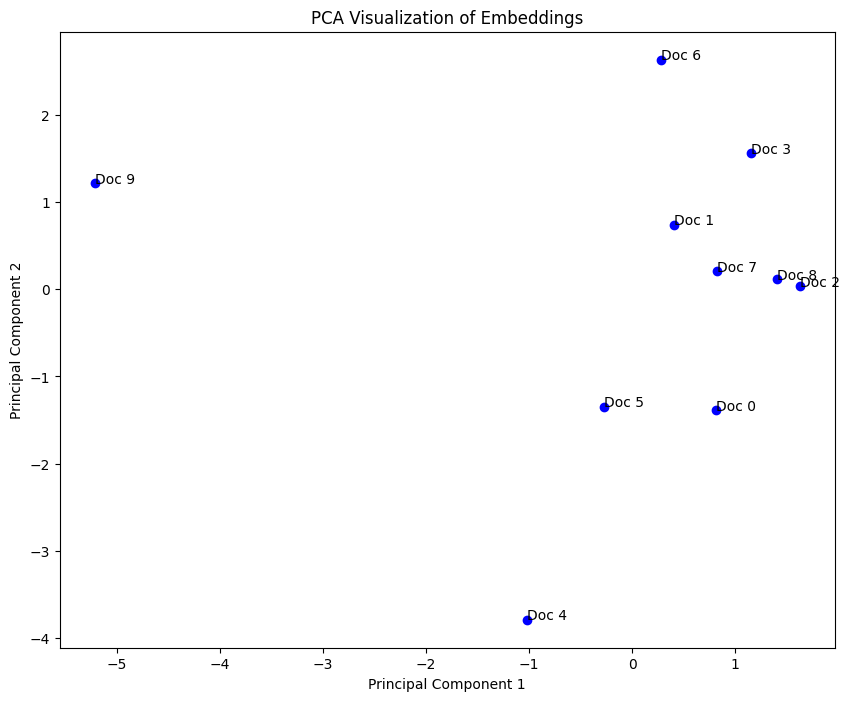

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_embeddings_pca(embeddings, labels=None, n_components=2):
    # Konvertiere die Liste der Embeddings in ein Numpy-Array
    embeddings_array = np.array(embeddings)
    
    # Führe PCA durch
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings_array)
    
    # Erstelle ein Streudiagramm
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', label='Documents')
    
    if labels:
        for i, label in enumerate(labels):
            plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    
    plt.title("PCA Visualization of Embeddings")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Beispielnutzung:
labels = [f"Doc {i}" for i in range(len(embeddings))]
visualize_embeddings_pca(embeddings, labels=labels)

In [7]:
import os
import pickle

def save_embeddings_and_metadata(embeddings, metadatas, filename="data/pickle/embeddings_metadata_v2.pkl"):
    # Sicherstellen, dass der Ordner "data/pickle" existiert
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    
    # Speichern der Embeddings und Metadaten in einer Datei
    with open(filename, "wb") as file:
        pickle.dump({'embeddings': embeddings, 'metadatas': metadatas}, file)
    
    print(f"Die Embeddings und Metadaten wurden erfolgreich in '{filename}' gespeichert.")

# Beispielnutzung:
save_embeddings_and_metadata(embeddings, metadatas, filename="data/pickle/embeddings_metadata_v2.pkl")

Die Embeddings und Metadaten wurden erfolgreich in 'data/pickle/embeddings_metadata_v2.pkl' gespeichert.
